<a href="https://colab.research.google.com/github/harshinip185/ML_Projects/blob/main/Titatic_ML_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### unzip a file

In [1]:
!mkdir "./data"

In [2]:
!unzip "titanic.zip" -d "./data"

Archive:  titanic.zip
  inflating: ./data/gender_submission.csv  
  inflating: ./data/test.csv         
  inflating: ./data/train.csv        


remove a file using rm
```
!rm file_name
```

### loading data from CSV format

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv("./data/train.csv") # loading the train data

In [5]:
train_df.shape # gives the number of columns and rows

(891, 12)

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.info() # shows the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df = pd.read_csv("./data/test.csv") # loading the test data

In [9]:
test_df.shape

(418, 11)

In [10]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


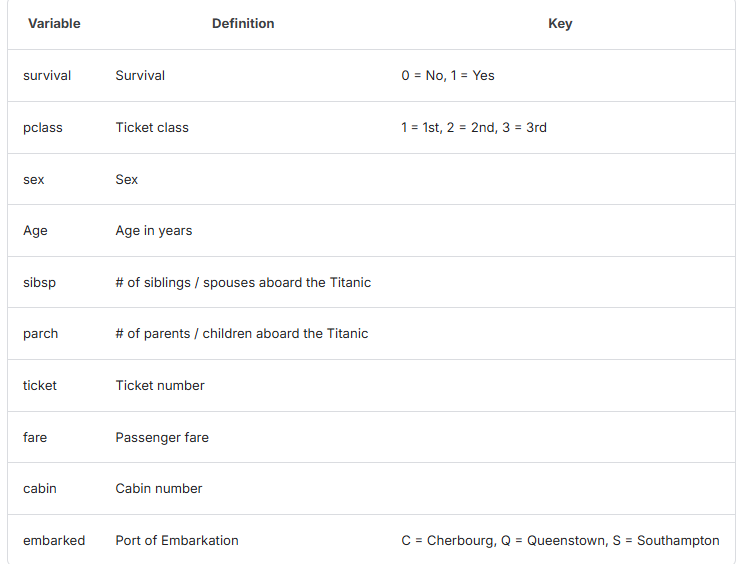

### Analysing the data

In [11]:
# check for the missing values. isnull only returns true or false for every cell
# .sum gives the total number of missing values for individual column
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
train_df.describe() # just analysed the numerical data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_df.describe(include = "object") # analysed the categorical data

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [14]:
# survival rate analysis
train_df["Survived"].value_counts()

,count
Survived,
0,549
1,342


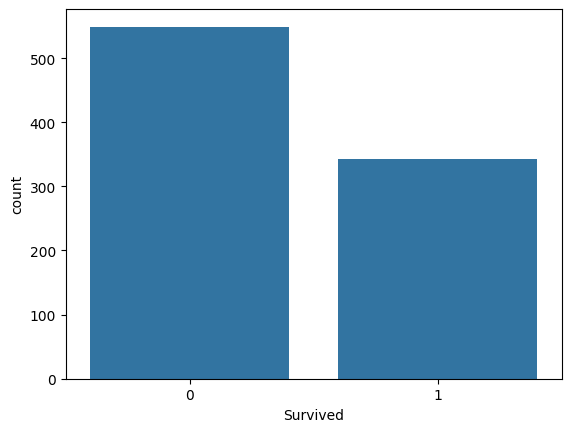

In [15]:
# visualisation of the data
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = "Survived", data = train_df) # use countplot when we need counts of categories
plt.show()

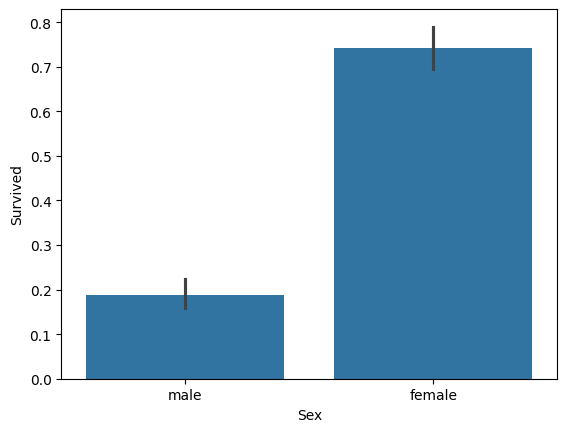

In [16]:
sns.barplot(x = "Sex", y = "Survived", data = train_df)
plt.show()

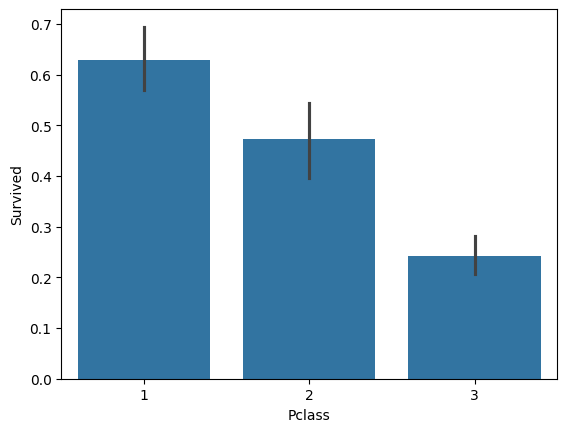

In [17]:
sns.barplot(x = "Pclass", y = "Survived", data = train_df)
plt.show()

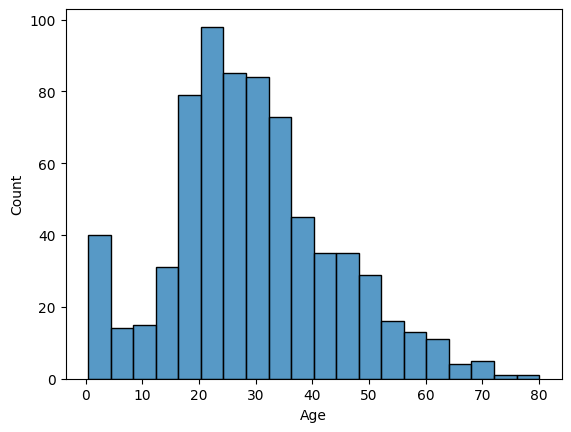

In [18]:
sns.histplot(x = "Age", data = train_df)
plt.show()

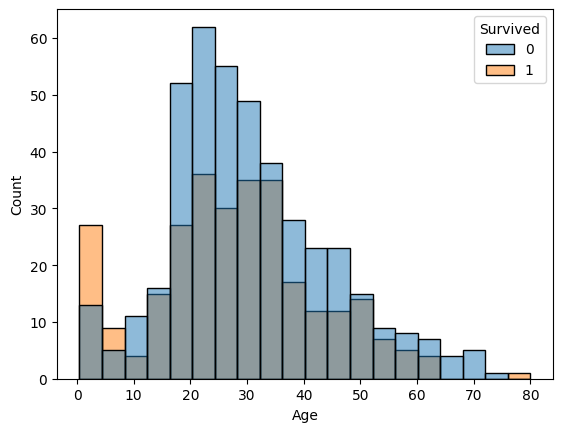

In [19]:
# To see which age group had the highest survival rate
sns.histplot(x = "Age", hue = "Survived", data = train_df)
plt.show()

### Imputing the missing values

In [20]:
train_df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [26]:
# filling the missing values in the age column by computing the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [27]:
train_df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


In [33]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [34]:
train_df['Embarked']

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


For numerical data use mean or median, but for categorical data or objects use mode.

In [35]:
# if the number of missing values is more than the info itself just drop the column
train_df.drop(columns = ["Cabin"], inplace = True)

In [36]:
train_df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']